In [7]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
aceh = pd.read_csv("dataframe (w_o test).csv")
#pilih hanya kolom "Date" dan "Aceh"
aceh = aceh[["Date", "Aceh"]]

#ubah tipe data "Date"
aceh["Date"] = pd.to_datetime(aceh["Date"])

#jadikan kolom "Date" sebagai index
aceh = aceh.set_index("Date")
aceh.index

aceh.head()

,Aceh
Date,
2022-01-01,22360.0
2022-01-02,23340.0
2022-01-03,22050.0
2022-01-04,22460.0
2022-01-05,19630.0


In [4]:
#convert to time series:
ts = aceh['Aceh']
ts.head(10)

Date
2022-01-01    22360.0
2022-01-02    23340.0
2022-01-03    22050.0
2022-01-04    22460.0
2022-01-05    19630.0
2022-01-06    20140.0
2022-01-07    22960.0
2022-01-08    21730.0
2022-01-09    20430.0
2022-01-10    19570.0
Name: Aceh, dtype: float64

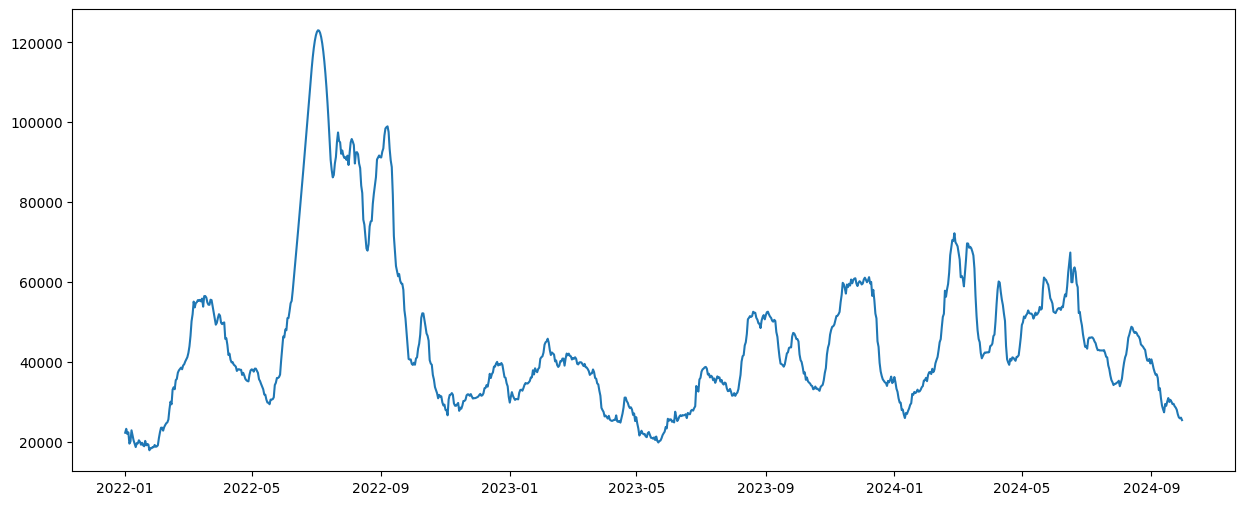

In [5]:
#plot the time series
plt.plot(ts)

In [8]:
#function for testing stationary
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries,window):
    
    #Determing rolling statistics
    #ts_log = np.log(ts)
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolmean = ts_log.rolling(window=12).mean()
    rolmean = pd.Series(timeseries).rolling(window=window).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    #rolstd = ts_log.rolling(window=12).std()
    rolstd = pd.Series(timeseries).rolling(window=window).std()


    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

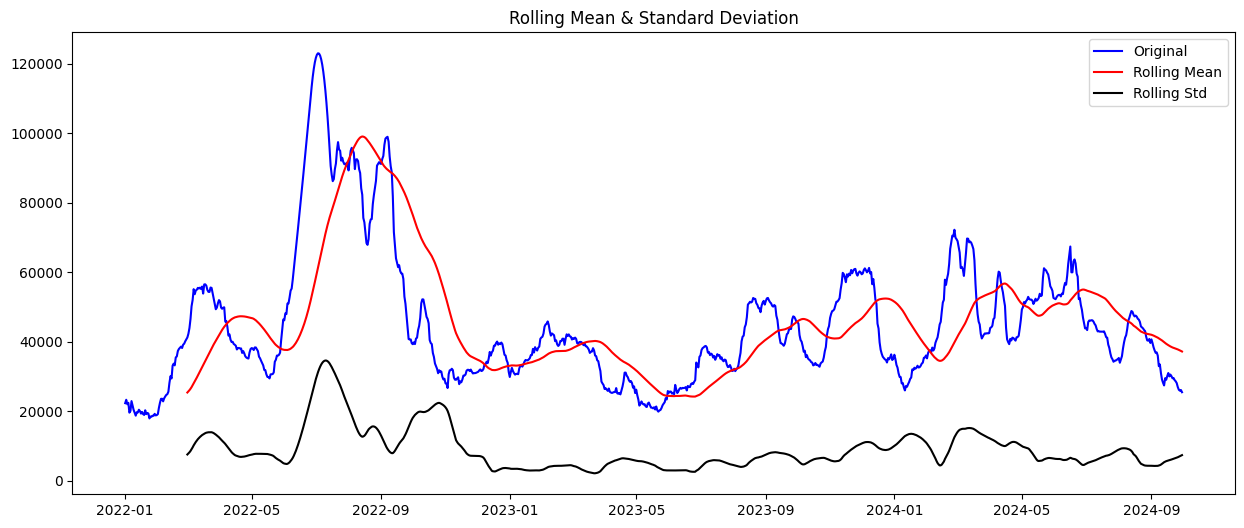

Results of Dickey-Fuller Test:
Test Statistic                  -3.376604
p-value                          0.011783
#Lags Used                      12.000000
Number of Observations Used    991.000000
Critical Value (1%)             -3.436966
Critical Value (5%)             -2.864461
Critical Value (10%)            -2.568325
dtype: float64


In [9]:
test_stationarity(ts,60)

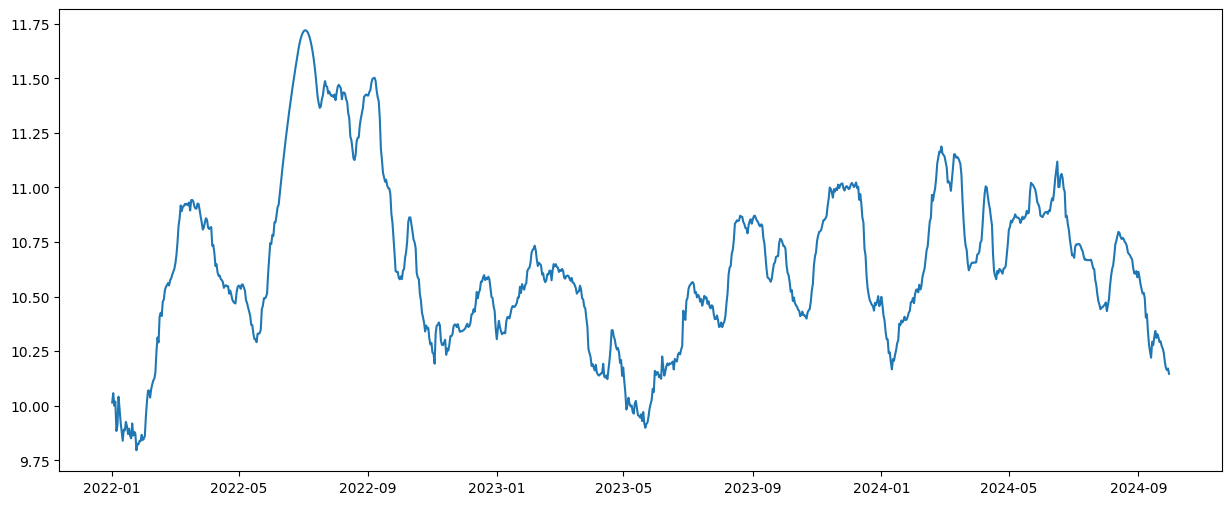

In [10]:
ts_log = np.log(ts)
plt.plot(ts_log)

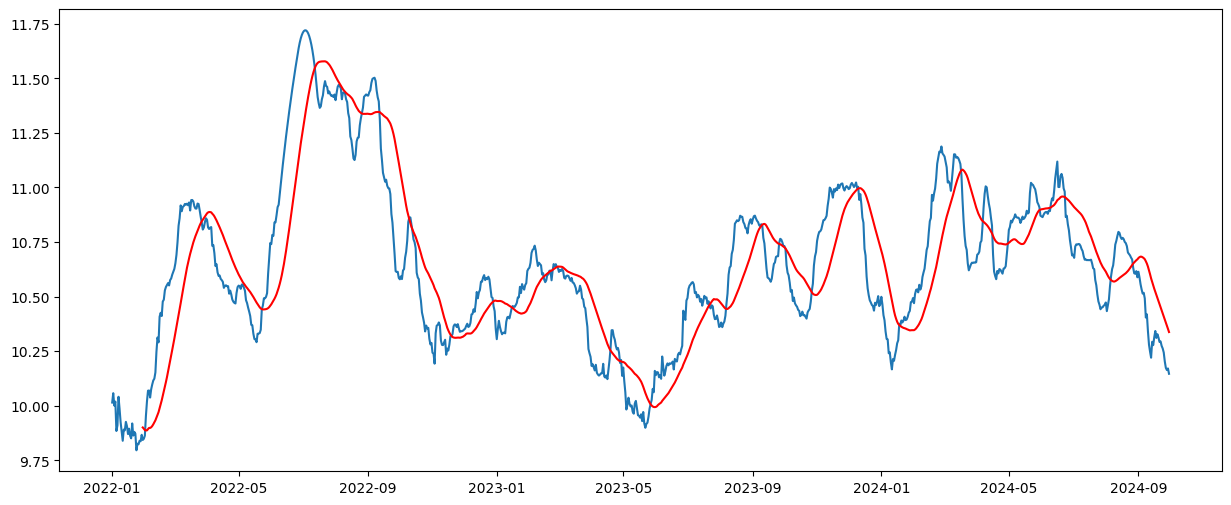

In [11]:
moving_avg = pd.Series(ts_log).rolling(window=30).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [12]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2022-01-01   NaN
2022-01-02   NaN
2022-01-03   NaN
2022-01-04   NaN
2022-01-05   NaN
2022-01-06   NaN
2022-01-07   NaN
2022-01-08   NaN
2022-01-09   NaN
2022-01-10   NaN
2022-01-11   NaN
2022-01-12   NaN
Name: Aceh, dtype: float64

In [13]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Date
2022-01-30   -0.057254
2022-01-31   -0.046427
2022-02-01   -0.025781
2022-02-02    0.065857
2022-02-03    0.132549
Name: Aceh, dtype: float64

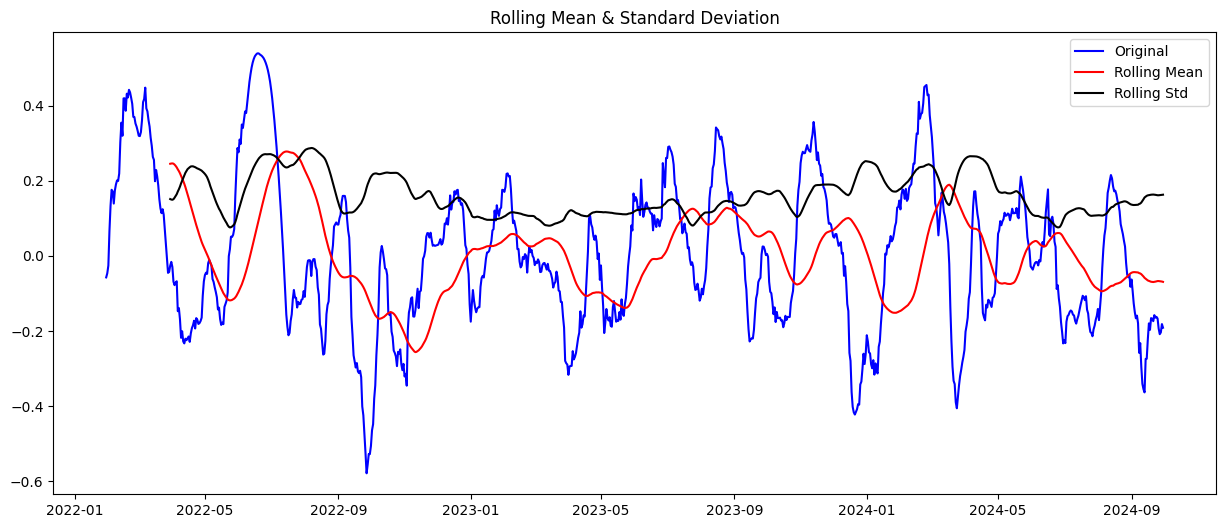

Results of Dickey-Fuller Test:
Test Statistic                  -5.543669
p-value                          0.000002
#Lags Used                      12.000000
Number of Observations Used    962.000000
Critical Value (1%)             -3.437166
Critical Value (5%)             -2.864549
Critical Value (10%)            -2.568372
dtype: float64


In [14]:
test_stationarity(ts_log_moving_avg_diff, 60)